In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def call_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    pnl = np.where(sT > strike_price, sT - strike_price, 0) - premium
    return pnl * contracts * multiplier

def put_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    pnl = np.where(sT < strike_price, strike_price - sT, 0) - premium
    return pnl * contracts * multiplier

## 양매도

만기시 주가가 call 행사가보다 낮고 put 행사가보다 높아야 한다. 예측이 빗나가면 손실은 무한대가 된다.

콜옵션 매도 : 332.5 1.79
콜옵션 매도 : 335 1.06
풋옵션 매도 : 320 1.37
풋옵션 매도 : 322.5 1.86
   319.0    1.5800000000000003
   320.0    3.58
   321.0    4.58
   322.0    5.58
   323.0    6.08
   324.0    6.08
   325.0    6.08
   326.0    6.08
   327.0    6.08
   328.0    6.08
   329.0    6.08
   330.0    6.08
   331.0    6.08
   332.0    6.08
   333.0    5.58
   334.0    4.58
   335.0    3.58
   336.0    1.5800000000000003


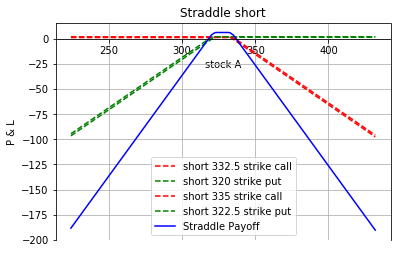

In [3]:
def straddle_short(strike_call, strike_put):
    
    payoff_short_call = []
    payoff_short_put = []
    payoff_straddle = 0
    
    sT_expiry = np.arange(0.7*strike_put[0][0],1.3*strike_call[0][0],1) 

    for st, pr in strike_call:
        print('콜옵션 매도 :', st, pr)
        payoff_short_call.append(-call_payoff(sT_expiry, st, pr))

    for st, pr in strike_put:
        payoff_short_put.append(-put_payoff(sT_expiry, st, pr))
        print('풋옵션 매도 :', st, pr)
    
    for i in range(len(payoff_short_call)):
        payoff_straddle += payoff_short_call[i] + payoff_short_put[i]

    fig, ax = plt.subplots()
    ax.spines['bottom'].set_position('zero')
    for i in range(len(strike_call)):
        ax.plot(sT_expiry, payoff_short_call[i], 'r--',
                label="short "+str(strike_call[i][0])+" strike call")
        ax.plot(sT_expiry, payoff_short_put[i], 'g--',
                label="short "+str(strike_put[i][0])+" strike put")
        
    ax.plot(sT_expiry, payoff_straddle, 'b-', label='Straddle Payoff')
    
    for i in range(len(payoff_straddle)):  
        if payoff_straddle[i] > 0:
            print('  ', sT_expiry[i], '  ', payoff_straddle[i])
    plt.legend()
    plt.grid(True)
    plt.xlabel('stock A')
    plt.ylabel('P & L')
    plt.title('Straddle short');
   
strike_call  = [(332.5, 1.79), (335, 1.06)]
strike_put  = [(320, 1.37), (322.5, 1.86)]

straddle_short(strike_call, strike_put)